<a href="https://colab.research.google.com/github/Prithviraj8/Paradigm/blob/base-model-setup/paradigm_dl_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown https://drive.google.com/uc?id=1iYTFuf4DgxgYQzTQ_2da1vC9es_niPRr

Downloading...
From (original): https://drive.google.com/uc?id=1iYTFuf4DgxgYQzTQ_2da1vC9es_niPRr
From (redirected): https://drive.google.com/uc?id=1iYTFuf4DgxgYQzTQ_2da1vC9es_niPRr&confirm=t&uuid=153852e2-17bb-49e9-96e4-7def97d6dd5c
To: /content/dataset_student.zip
100% 11.8G/11.8G [02:49<00:00, 69.8MB/s]


In [ ]:
!tar -xvf dataset_student.zip

Streaming output truncated to the last 5000 lines.
dataset/val/video_01791/image_3.png
dataset/val/video_01791/image_4.png
dataset/val/video_01791/image_5.png
dataset/val/video_01791/image_6.png
dataset/val/video_01791/image_7.png
dataset/val/video_01791/image_8.png
dataset/val/video_01791/image_9.png
dataset/val/video_01791/mask.npy
dataset/val/video_01792/
dataset/val/video_01792/image_0.png
dataset/val/video_01792/image_1.png
dataset/val/video_01792/image_10.png
dataset/val/video_01792/image_11.png
dataset/val/video_01792/image_12.png
dataset/val/video_01792/image_13.png
dataset/val/video_01792/image_14.png
dataset/val/video_01792/image_15.png
dataset/val/video_01792/image_16.png
dataset/val/video_01792/image_17.png
dataset/val/video_01792/image_18.png
dataset/val/video_01792/image_19.png
dataset/val/video_01792/image_2.png
dataset/val/video_01792/image_20.png
dataset/val/video_01792/image_21.png
dataset/val/video_01792/image_3.png
dataset/val/video_01792/image_4.png
dataset/val/vid

In [ ]:
import glob
import os
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(f"The training set has {len(os.listdir('dataset/train'))} videos, and each video has {len(glob.glob('dataset/train/video_00000/*.png'))} frames and {len(glob.glob('dataset/train/video_00000/*.npy'))} mask file for all frames")
print(f"The validation set has {len(os.listdir('dataset/val'))} videos, and each video has {len(glob.glob('dataset/val/video_01000/*.png'))} frames and {len(glob.glob('dataset/val/video_01000/*.npy'))} mask file for all frames")
print(f"The unlabeled set has {len(os.listdir('dataset/unlabeled'))} videos, and each video has {len(glob.glob('dataset/unlabeled/video_02000/*.png'))} frames and {len(glob.glob('dataset/unlabeled/video_02000/*.npy'))} mask file for all frames")

The training set has 1000 videos, and each video has 22 frames and 1 mask file for all frames
The validation set has 1000 videos, and each video has 22 frames and 1 mask file for all frames
The unlabeled set has 13000 videos, and each video has 22 frames and 0 mask file for all frames


In [ ]:
mask = np.load('dataset/train/video_00000/mask.npy')
print(f"The mask file has the shape {mask.shape}.")
img = Image.open('dataset/train/video_00000/image_0.png')
data = np.asarray(img, dtype="int32")
print(f"Each image has the shape {data.shape}")

The mask file has the shape (22, 160, 240).
Each image has the shape (160, 240, 3)


In [ ]:
print("Let's visualize them:")

def get_a_random_image(dir="dataset/train"):
    all_videos = os.listdir(dir)
    picked_video = random.choice(all_videos)
    all_images = os.listdir(os.path.join(dir, picked_video))
    picked_image = random.choice(all_images)
    picked_image_idx = int(picked_image[len("image_"):-len(".png")])

    img = Image.open(os.path.join(dir, picked_video, picked_image))
    data = np.asarray(img, dtype="int32")


    mask = np.load(os.path.join(dir, picked_video, "mask.npy"))

    return data, mask[picked_image_idx]

Let's visualize them:


(-0.5, 239.5, 159.5, -0.5)

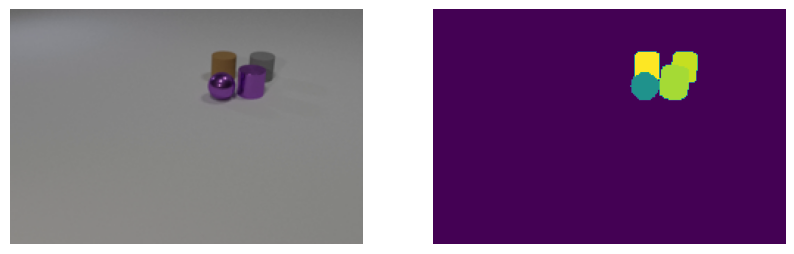

In [ ]:
data, mask = get_a_random_image()
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.imshow(data)
plt.axis('off')

# Plot the second image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.imshow(mask)
plt.axis('off')

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


## Plotting images to visualize more masked frames

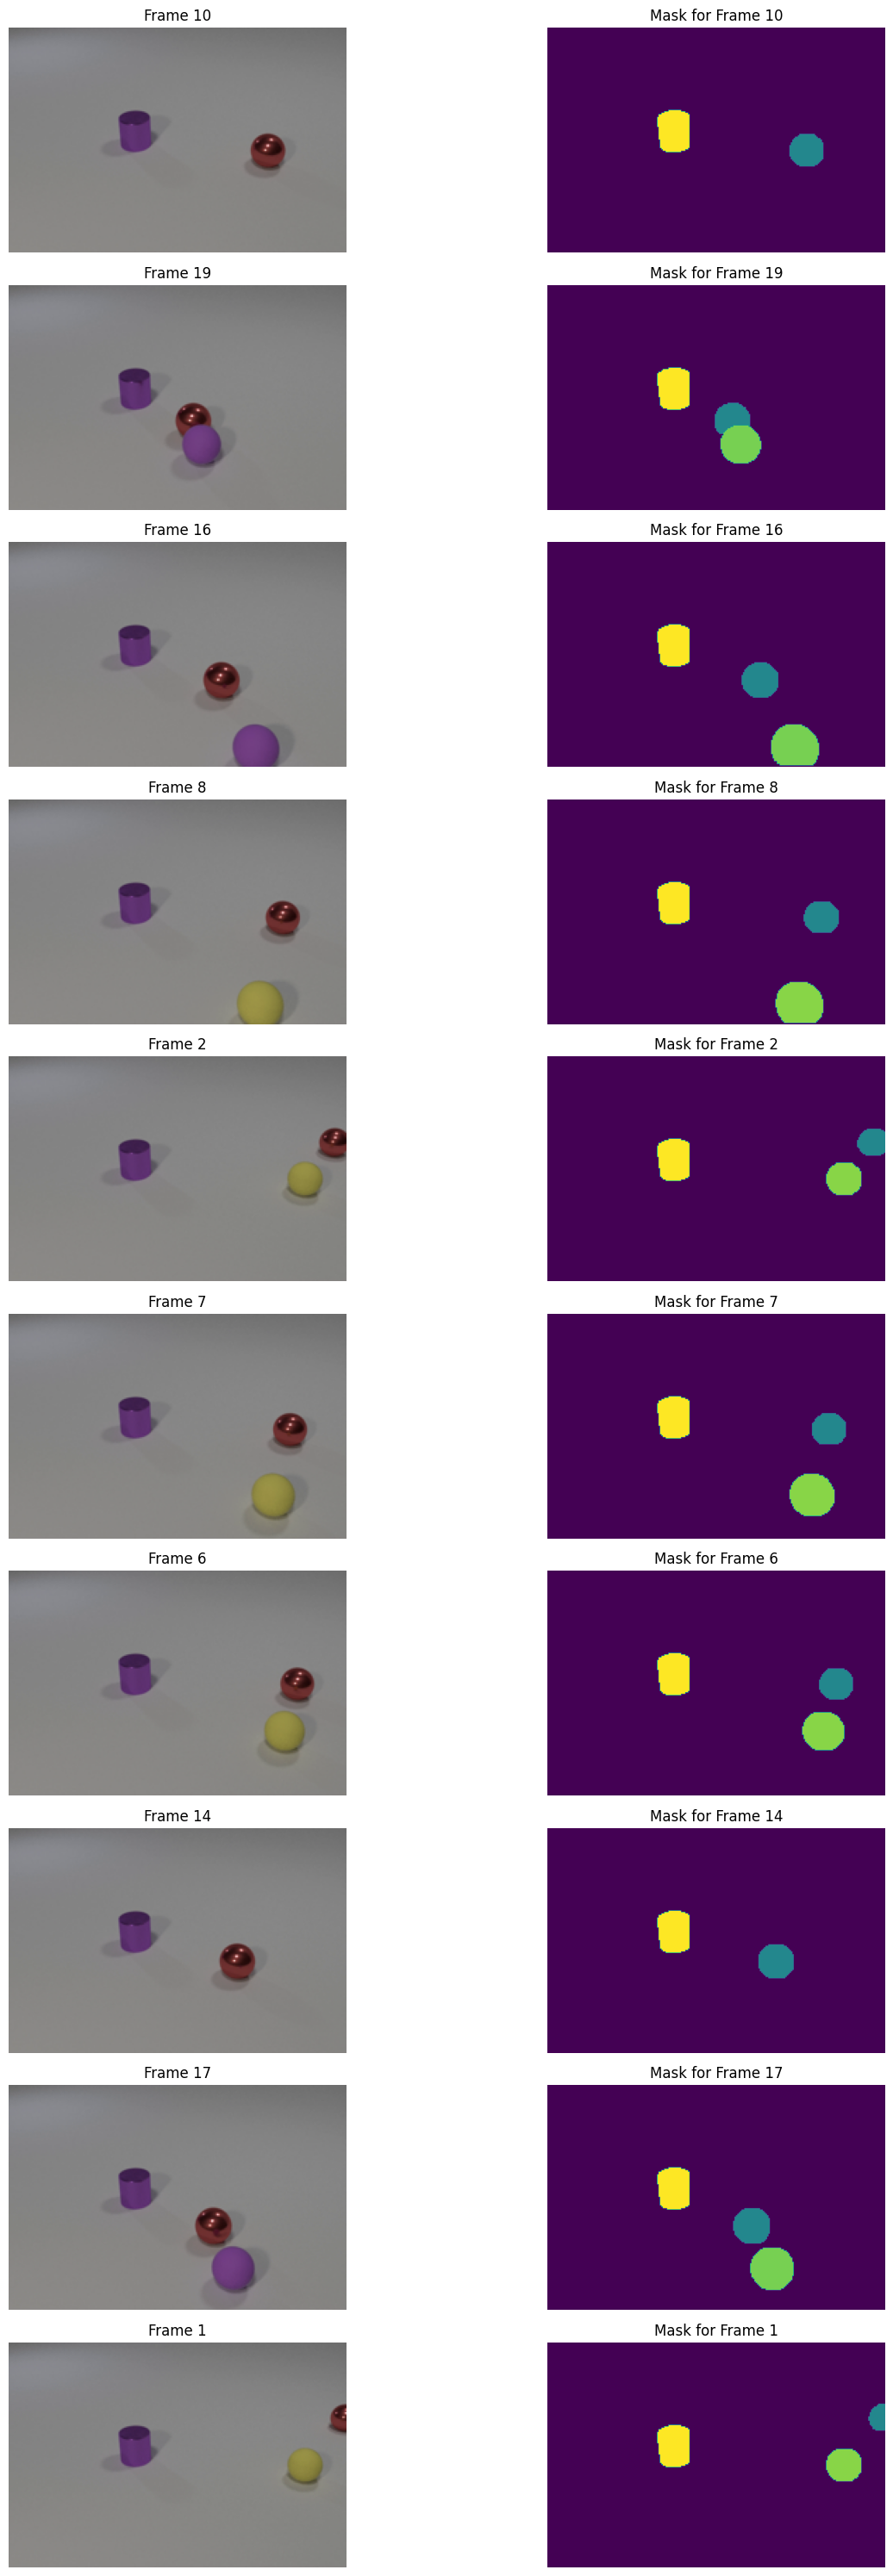

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import random

def visualize_labels(dir="dataset/train", num_frames=5):
    all_videos = os.listdir(dir)
    picked_video = random.choice(all_videos)
    video_path = os.path.join(dir, picked_video)
    all_images = sorted([img for img in os.listdir(video_path) if img.startswith('image_')])
    picked_images = random.sample(all_images, num_frames)

    mask = np.load(os.path.join(video_path, "mask.npy"))

    plt.figure(figsize=(15, 3 * num_frames))

    for i, img_name in enumerate(picked_images):
        img_path = os.path.join(video_path, img_name)
        img = Image.open(img_path)
        data = np.asarray(img, dtype="int32")
        frame_idx = int(img_name[len("image_"):-len(".png")])

        plt.subplot(num_frames, 2, 2*i + 1)
        plt.imshow(data)
        plt.title(f"Frame {frame_idx}")
        plt.axis('off')

        plt.subplot(num_frames, 2, 2*i + 2)
        plt.imshow(mask[frame_idx])
        plt.title(f"Mask for Frame {frame_idx}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to visualize labels
visualize_labels("dataset/train", num_frames=10)


# Setting up Baseline CNN Model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
import torch.nn.functional as F


class Simple3DCNN(nn.Module):
    def __init__(self):
        super(Simple3DCNN, self).__init__()
        self.conv1 = nn.Conv3d(3, 64, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.pool = nn.MaxPool3d((1, 2, 2))
        self.conv2 = nn.Conv3d(64, 128, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.fc1 = nn.Linear(128 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, 2)  # Assuming binary segmentation for simplicity

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 128 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# # Initialize model, optimizer, and loss function
# model = Simple3DCNN()
# optimizer = optim.Adam(model.parameters(), lr=0.001)
# criterion = nn.CrossEntropyLoss()
# Assuming Simple3DCNN is already defined
model = Simple3DCNN().to(device)  # Send model to GPU if available, else CPU
criterion = nn.CrossEntropyLoss()  # For multi-class segmentation
optimizer = optim.Adam(model.parameters(), lr=0.001)



## Building the training loader

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import os
import numpy as np
from PIL import Image

class VideoDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (string): Directory with all the video folders.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.root_dir = root_dir
        self.transform = transform
        self.videos = os.listdir(root_dir)

    def __len__(self):
        return len(self.videos)

    def __getitem__(self, idx):
        video_path = os.path.join(self.root_dir, self.videos[idx])
        frames = []
        masks = []

        frame_files = sorted([f for f in os.listdir(video_path) if f.endswith('.png')])
        mask_file = os.path.join(video_path, 'mask.npy')
        mask = np.load(mask_file)

        for frame_file in frame_files:
            frame_path = os.path.join(video_path, frame_file)
            frame = Image.open(frame_path)
            frame = frame.convert('RGB')
            frames.append(frame)

        sample = {'frames': frames, 'mask': mask}

        if self.transform:
            sample = self.transform(sample)

        return sample


In [ ]:
from torchvision import transforms

class ToTensor(object):
    def __call__(self, sample):
        frames, mask = sample['frames'], sample['mask']

        # Convert frames and masks to tensors
        frames = [transforms.functional.to_tensor(frame) for frame in frames]
        frames = torch.stack(frames, dim=0)  # Create a 4D Tensor

        mask = torch.from_numpy(mask).type(torch.LongTensor)  # For CrossEntropyLoss

        return {'frames': frames, 'mask': mask}

transformed_dataset = VideoDataset(root_dir='dataset/train', transform=transforms.Compose([ToTensor()]))


# Training

In [ ]:
train_loader = DataLoader(transformed_dataset, batch_size=4, shuffle=True, num_workers=4)
for i, batch in enumerate(train_loader):
    frames = batch['frames']  # Tensor of shape (batch_size, num_frames, C, H, W)
    masks = batch['mask']  # Tensor of shape (batch_size, H, W)
    break

    # Your training code here
